In [12]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

# set operations to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [13]:
data = pd.read_csv('../data/MergedData.csv')

In [14]:
data.describe()

,Year,GDP,Inflation,Unemployment,Average Policy Rate
count,20.000,20.000,20.000,20.000,20.000
mean,2012.500,5.892,14.613,4.624,17.607
std,5.916,3.007,6.506,1.461,4.041
min,2003.000,0.514,7.144,2.170,12.750
25%,2007.750,4.103,10.543,3.407,14.525
50%,2012.500,5.750,12.026,4.643,16.167
75%,2017.250,7.459,17.226,5.379,19.357
max,2022.000,14.047,31.256,7.736,25.917


In [15]:
# Create a trace for each indicator
gdp_trace = go.Scatter(x=data.index, y=data['GDP'], mode='lines', name='GDP')
inflation_trace = go.Scatter(x=data.index, y=data['Inflation'], mode='lines', name='Inflation')
unemployment_trace = go.Scatter(x=data.index, y=data['Unemployment'], mode='lines', name='Unemployment')
policy_rate_trace = go.Scatter(x=data.index, y=data['Average Policy Rate'], mode='lines', name='Average Policy Rate')

# Create a layout
layout = go.Layout(title='GDP, Inflation, and Unemployment over the Years', xaxis=dict(title='Year'), yaxis=dict(title='Value'))

# Create a Figure and add the traces
fig = go.Figure(data=[gdp_trace, inflation_trace, unemployment_trace, policy_rate_trace ], layout=layout)

# Show the figure
fig.show()

In [16]:
# Define predictors and target
predictors = ['GDP', 'Inflation', 'Unemployment'] # replace with your actual predictors
target = 'Average Policy Rate'  # replace with your actual target column


In [17]:
predictors

['GDP', 'Inflation', 'Unemployment']

In [18]:
X = data[predictors]
y = data[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [20]:
# decision tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [21]:
#random forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [22]:
# Make predictions
dt_preds = dt.predict(X_test)
rf_preds = rf.predict(X_test)


In [23]:
dt_mse = mean_squared_error(y_test, dt_preds)
rf_mse = mean_squared_error(y_test, rf_preds)

In [24]:
# print errors  
print(f'Decision Tree MSE: {dt_mse}')
print(f'Random Forest MSE: {rf_mse}')

Decision Tree MSE: 12.405339166666664
Random Forest MSE: 8.913731688378666


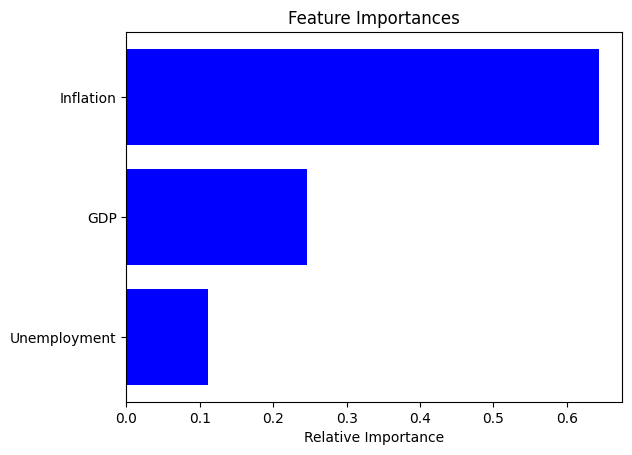

In [25]:
# plot the importance of each feature
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [predictors[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Text(0.5, 1.0, 'Actual vs Predicted')

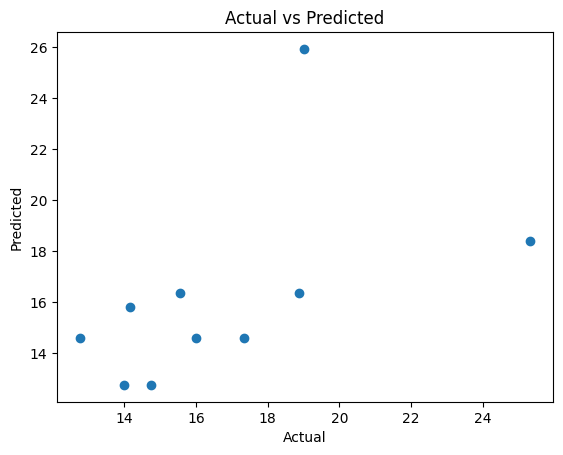

In [27]:
# actual vs predicted
plt.scatter(y_test, dt_preds)

plt.xlabel('Actual')

plt.ylabel('Predicted')

plt.title('Actual vs Predicted')